<a href="https://colab.research.google.com/github/sayana25/IQCQ-UPES-2023/blob/main/Quantum_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qiskit

In [2]:
!pip install pylatexenc

In [27]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.7 MB/s eta 0:00:00


In [52]:
import qiskit.tools.jupyter
%qiskit_version_table

### Create Entangled Qubit Pair

Let's revise the creation of the the maximally-entangled Bell state
$$
|\Phi\rangle = \frac{1}{\sqrt{2}} \left(|00\rangle + |11\rangle \right)
$$
which is created with a Hadamard gate followed by a CNOT with the target on the same qubit as the Hadamard. This will be used in the quantum teleportation protocol.

In [3]:
from qiskit.circuit import Parameter
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import pi, sqrt

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


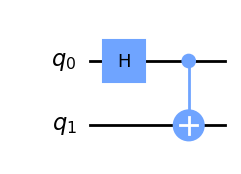

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.draw('mpl')

Classically, or in classical computers copying classical information and tranferring it from one place to another is not a problem. However in **quantum computers**, the act of transferring information by copying implicitly means &**doing a measurement which destroys the state of the system.**

*It is not possible to transfer quantum information using classical communication alone (Proof available).*


# Teleportation

Quantum information cannot be copied due to the *No Cloning Theorem*, however it can be **teleported** in the sense that a qubit can be entangled with a quantum resource, and via a protocol of measurements and classical communication of their results, the original quantum state can be reconstructed on a different qubit. This process destroys the information in the original qubit via measurement.

At first, we construct a particular qubit state, the bell state and then transfer that state to another qubit using the **teleportation protocol**.

**No Physical transportation of qubit from one place to another, transfer from quantum information from one qubit to another.**

**No-Cloning Theorem** :  
*Impossible to create an independent and identical copy of an arbitrary unknown quantum state, has great implications in quantum computation.*

*Uses Entanglement as a resource*

In [25]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

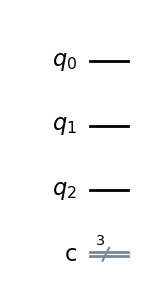

In [19]:
circuit = QuantumCircuit(3,3)
circuit.draw(output = 'mpl')

We will transfer the state in $q_0$ to $q_2$ while $q_{1}$ will be a resourcewe use in doing this process

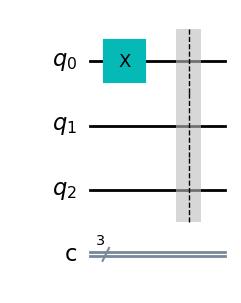

In [20]:
circuit.x(0) # takes q0 from |0> to the |1> state
circuit.barrier()
circuit.draw('mpl')

*Next step is to create entanglement between $q_1$ and $q_2$*

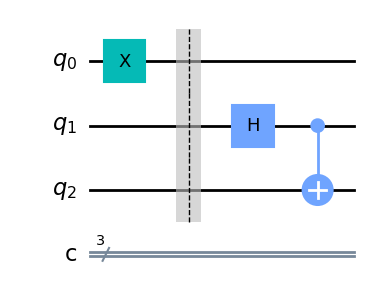

In [21]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw('mpl')

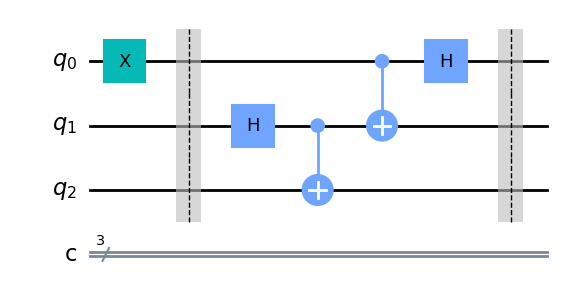

In [22]:
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.draw('mpl')

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


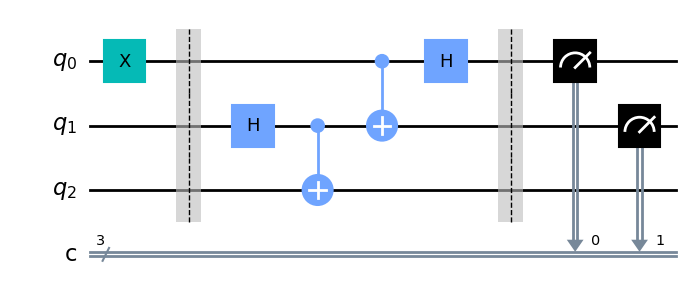

In [23]:
circuit.measure([0,1],[0,1])
circuit.draw('mpl')

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


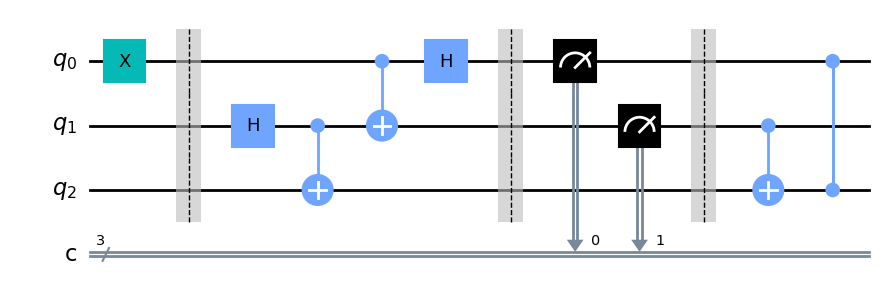

In [24]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw('mpl')

Now that we have created a very basic quantum teleportation protocol circuit, we expect that if we measure the state $q_{2}$ now, we expect to get the state $|1\rangle$ . Let's run it on the simulator (qasm_simulator).

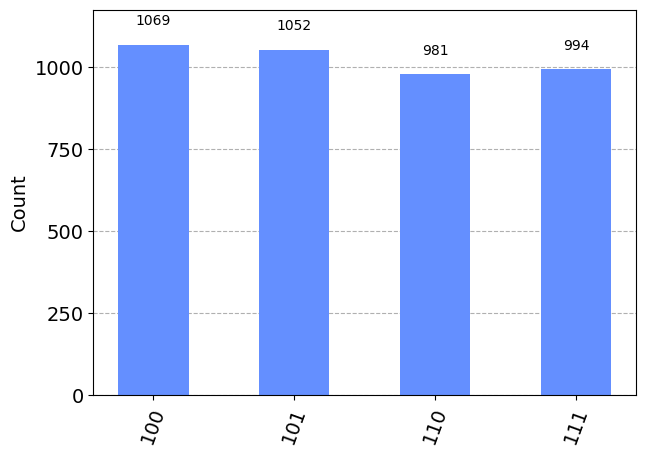

In [30]:
circuit.measure(2,2) # measurement on q2


simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots = 4096).result()
counts = result.get_counts()

plot_histogram(counts)



**Note that the results are read in the following order, $c_2 c_1 c_0 \rightarrow 100$, and so on.. and NOTE THAT we only get the results where $c_2$
 is 1**.

In [31]:
print(counts)

{'100': 1069, '101': 1052, '110': 981, '111': 994}


# What do we get when the state of the $q_{0}$ is a superposition state such as $(|0\rangle + |1\rangle)/\sqrt{2}$?

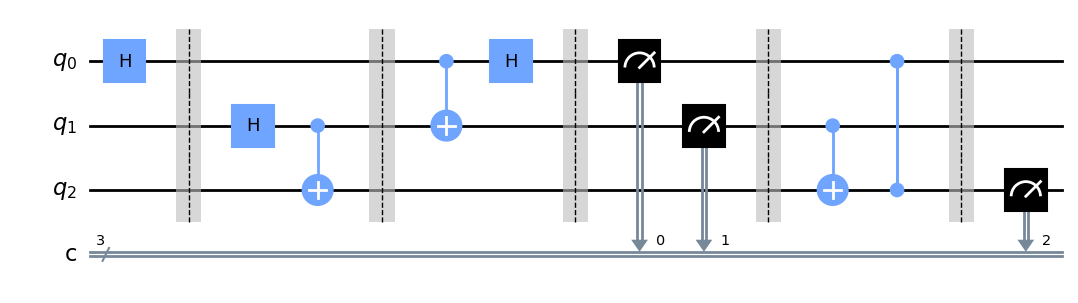

In [44]:
circuit = QuantumCircuit(3,3)
circuit.h(0) # takes q0 from |0> to the superposition state and this is the state we want to teleport
circuit.barrier() #this is just a visual aid

##########Create an entangled Bell pair between Alice and Bob i.e. q1 and q2 ##################
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()
##############
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()
##################################Measurement in the normal z basis #######
circuit.measure(2,2)
circuit.draw('mpl')

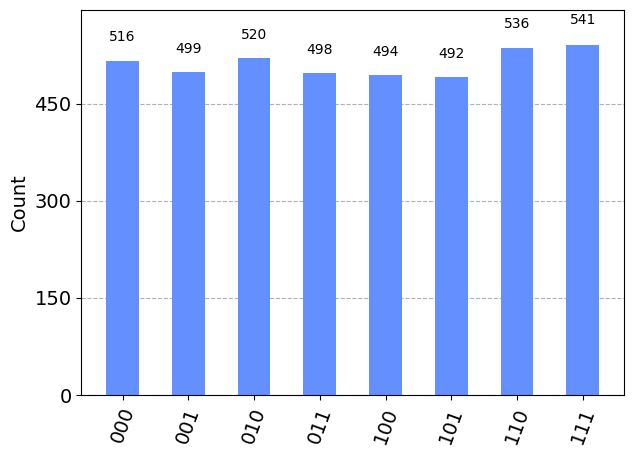

In [45]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots = 4096).result()
counts = result.get_counts()

plot_histogram(counts)

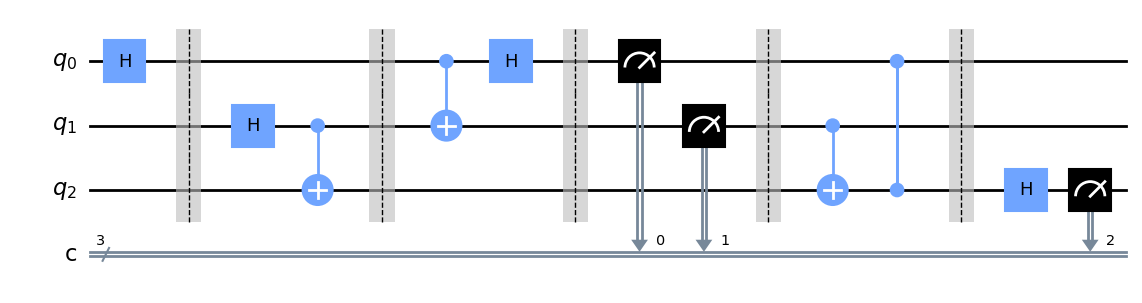

In [46]:
circuit = QuantumCircuit(3,3)
circuit.h(0) # takes q0 from |0> to the superposition state and this is the state we want to teleport
circuit.barrier() #this is just a visual aid

##########Create an entangled Bell pair between Alice and Bob i.e. q1 and q2 ##################
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()
##############
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()
circuit.h(2) #note that the hadamard gate is added here because we want to measure in the hadamard basis instead of the standard z basis, it gives the state q0 is in
circuit.measure(2,2)
circuit.draw('mpl')

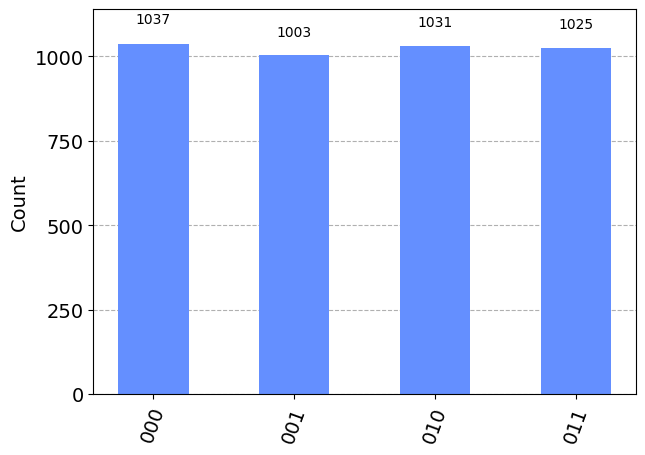

In [47]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots = 4096).result()
counts = result.get_counts()

plot_histogram(counts)


**The circuit diagram for QT protocol**


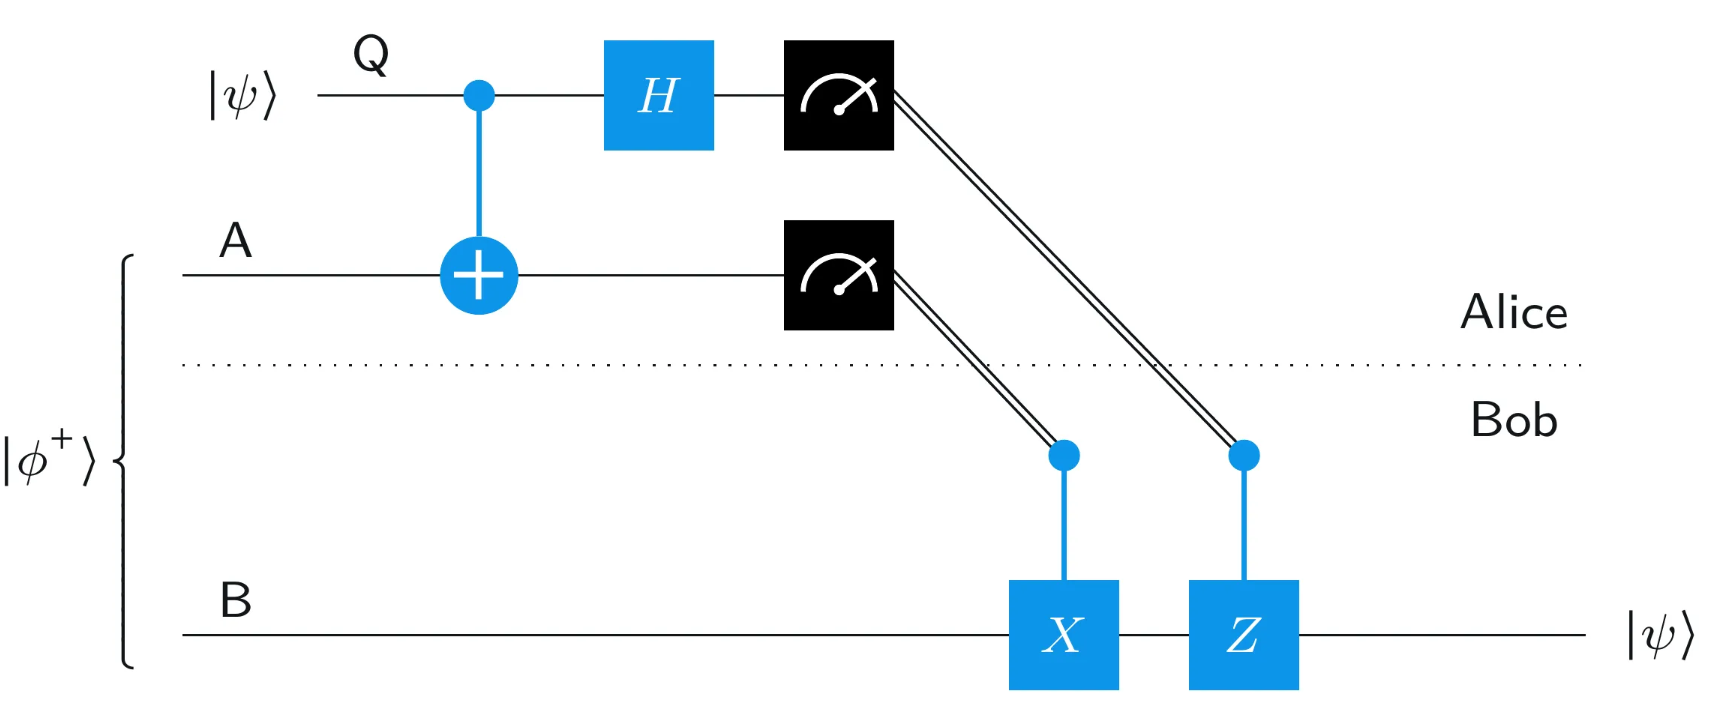

1) The sender may not know the particular quantum state that is being sent.


2) The location of the recipient maybe unknown, but classical information needs to be sent,  and since classical information is being transmitted there is no violation of special relativity, no matter how far Alice and Bob are apart.

For more details please see : https://learning.quantum.ibm.com/course/basics-of-quantum-information/entanglement-in-action